In [1]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastai.vision.all import *
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path = Path('/content/drive/MyDrive/retina_dataset')


Load Dataset with ImageDataLoaders

In [27]:
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,
    seed = 1,
    item_tfms=Resize(384),
    batch_tfms=aug_transforms(),
    bs=16
)

Display sample batch in data loader

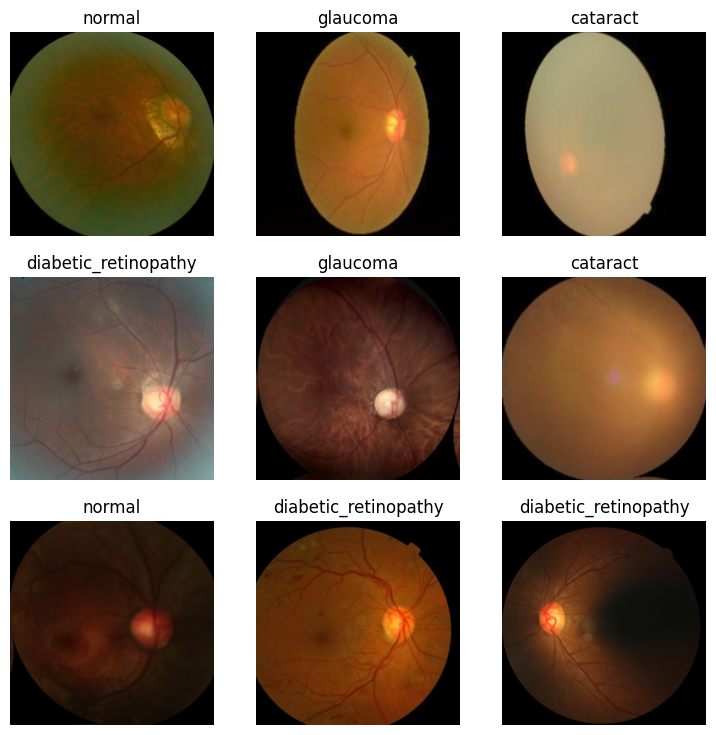

In [9]:
dls.show_batch()

Create learner

In [28]:
from fastai.metrics import error_rate, Precision, Recall, F1Score
learn = vision_learner(
    dls,
    resnet50,
    metrics=[accuracy, error_rate, Precision(average='macro'), Recall(average='macro'), F1Score(average='macro')])

In [32]:
learn.fine_tune(5) # total training done: 18 epochs

epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,f1_score,time
0,0.145521,0.259958,0.934757,0.065243,0.933926,0.933383,0.932239,01:21


epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,f1_score,time
0,0.122945,0.324589,0.924081,0.075919,0.922069,0.922190,0.921344,01:44
1,0.199620,0.404906,0.901542,0.098458,0.907329,0.898841,0.895667,01:44
2,0.148572,0.301875,0.924081,0.075919,0.922364,0.922080,0.921019,01:43
3,0.074799,0.281697,0.926453,0.073547,0.927169,0.924805,0.923354,01:45
4,0.063103,0.272771,0.932384,0.067616,0.932187,0.930932,0.929597,01:44


Visualize confusion matrix

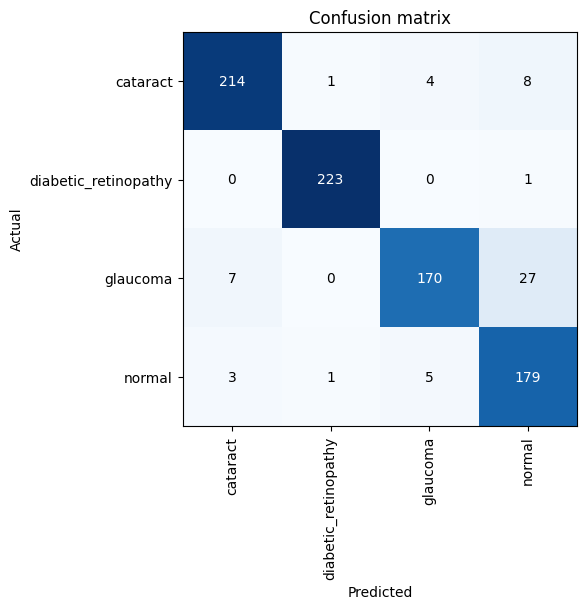

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))

save and export model

In [35]:
learn.export('retina_model.pkl')